In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os

misfit_path = 'D:/PycharmProjects/GPUpy/Qiu_data/CVMHTrainingDataset/Figure/misfit/'
CVMH_mis = np.load(misfit_path+'CVMH_misfit_list.npy')
CNN_mis = np.load(misfit_path+'CNN_misfit_list.npy')
GAN_mis = np.load(misfit_path+'GAN_misfit_list.npy')
Qiu_mis = np.load(misfit_path+'Qiu_misfit_list.npy')
WCGAN_mis = np.load(misfit_path+'WCGAN_misfit_list.npy')
WCGAN_pos_mis = np.load(misfit_path+'WCGAN_pos_misfit_list.npy')
WCGAN_grid01_mis = np.load(misfit_path+'WCGAN_grid01_misfit_list.npy')

In [2]:
def clip_misfit(misfit_list,val_min,val_max):
    for i in range(len(misfit_list)):
        if misfit_list[i] > val_max:
            misfit_list[i] = val_max
        if misfit_list[i] < val_min:
            misfit_list[i] = vali_min
    return misfit_list

In [3]:
def cumulative_density(misfit_list,nbins,val_min,val_max):
    nitems = len(misfit_list)
    xval = np.linspace(val_min,val_max,nbins)
    #print(xval)
    yval = np.zeros((nbins,1))
    count = 0;
    for x in xval:
        nsmall = sum(mis <= x for mis in misfit_list)
        yval[count] = nsmall/nitems
        count += 1
    return xval, yval
    

In [4]:
clipval1 = 4
clipval2 = 4
clip_misfit(CVMH_mis,0,clipval2)
clip_misfit(CNN_mis,0,clipval1)
clip_misfit(GAN_mis,0,clipval1)
clip_misfit(Qiu_mis,0,4)
clip_misfit(WCGAN_mis,0,4)
clip_misfit(WCGAN_pos_mis,0,4)
clip_misfit(WCGAN_grid01_mis,0,4)
np.max(CNN_mis)

4.0

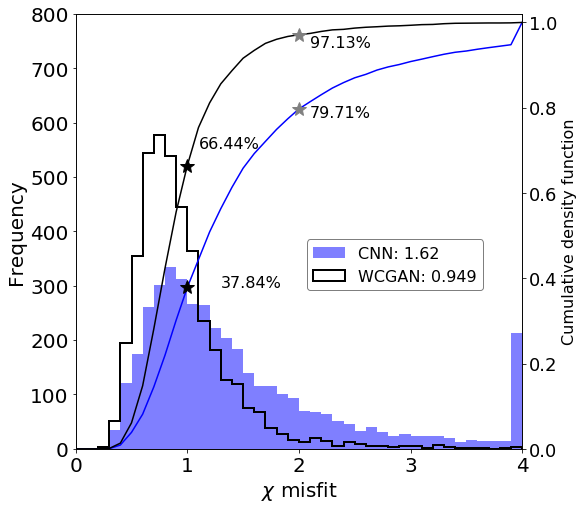

In [5]:
col1 = 'blue'
col2 = 'orange'
col2 = 'black'
valmax = 4
plt.figure(figsize=(8,8))
import scipy.stats as st
plt.hist(CNN_mis, density=False, alpha=0.5, color=col1, range=(0,valmax), bins=40, label="CNN: 1.62")
plt.hist(WCGAN_mis, density=False, histtype='step', facecolor='g', linewidth=2, alpha=1.0, color=col2, range=(0,4), bins=40, label="WCGAN: 0.949")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 0.5), edgecolor='black', framealpha=0.5, fontsize=16)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('$\chi$ misfit', fontsize=20)
plt.xlim([0,valmax])
plt.ylim([0,800])
plt.tick_params(labelsize=20)

#plt.title("Histogram",fontsize=26);
ax = plt.gca()
ax2 = ax.twinx()
xval, dense = cumulative_density(CNN_mis,41,0,4)
ax2.plot(xval, dense, color=col1)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.3, dense[idx], '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.02, '%2.2f%%' % (dense[idx]*100), fontsize=16)

xval, dense = cumulative_density(WCGAN_mis,41,0,4)
ax2.plot(xval, dense, color=col2)
ax2.set_ylim((0,1.02))
ax2.set_ylabel("Cumulative density function",color="black",fontsize=16)
ax2.yaxis.set_tick_params(labelsize=18)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.1, dense[idx]+0.04, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.03, '%2.2f%%' % (dense[idx]*100), fontsize=16)

plt.savefig(misfit_path+'hist_CNN_Chi.jpg', format='jpg', bbox_inches='tight', dpi=1200)
#plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.pdf', format='pdf')
plt.show()

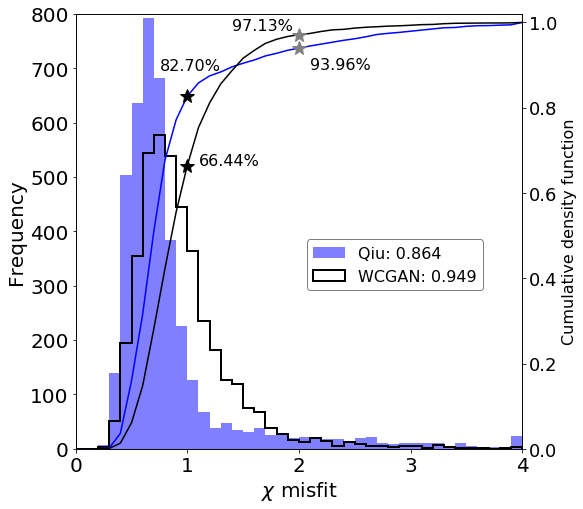

In [6]:
col1 = 'blue'
col2 = 'orange'
col2 = 'black'
plt.figure(figsize=(8,8))
import scipy.stats as st
plt.hist(Qiu_mis, density=False, alpha=0.5, color=col1, range=(0,4), bins=40, label="Qiu: 0.864")
plt.hist(WCGAN_mis, density=False, histtype='step', facecolor='g', linewidth=2, alpha=1.0, color=col2, range=(0,4), bins=40, label="WCGAN: 0.949")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 0.5), edgecolor='black', framealpha=0.5, fontsize=16)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('$\chi$ misfit', fontsize=20)
plt.xlim([0,4])
plt.ylim([0,800])
plt.tick_params(labelsize=20)

#plt.title("Histogram",fontsize=26);
ax = plt.gca()
ax2 = ax.twinx()
xval, dense = cumulative_density(Qiu_mis,41,0,4)
ax2.plot(xval, dense, color=col1)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(0.75, dense[idx]+0.06, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.05, '%2.2f%%' % (dense[idx]*100), fontsize=16)

xval, dense = cumulative_density(WCGAN_mis,41,0,4)
ax2.plot(xval, dense, color=col2)
ax2.set_ylim((0,1.02))
ax2.set_ylabel("Cumulative density function",color="black",fontsize=16)
ax2.yaxis.set_tick_params(labelsize=18)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.1, dense[idx], '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(1.4, dense[idx]+0.01, '%2.2f%%' % (dense[idx]*100), fontsize=16)

plt.savefig(misfit_path+'hist_Qiu_Chi.jpg', format='jpg', bbox_inches='tight', dpi=1200)
#plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.pdf', format='pdf')
plt.show()

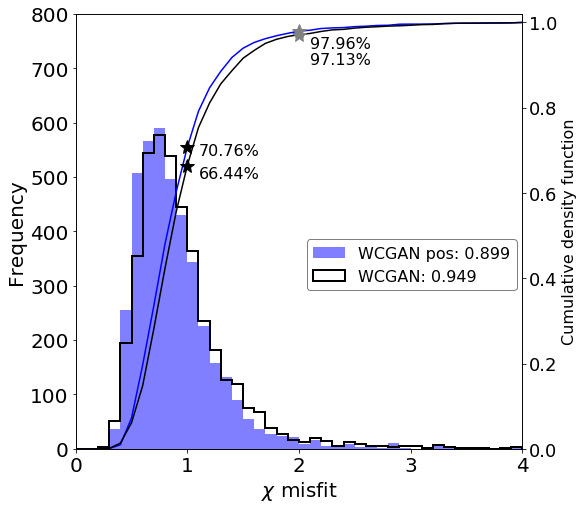

In [7]:
col1 = 'blue'
col2 = 'orange'
col2 = 'black'
plt.figure(figsize=(8,8))
import scipy.stats as st
plt.hist(WCGAN_pos_mis, density=False, alpha=0.5, color=col1, range=(0,4), bins=40, label="WCGAN pos: 0.899")
plt.hist(WCGAN_mis, density=False, histtype='step', facecolor='g', linewidth=2, alpha=1.0, color=col2, range=(0,4), bins=40, label="WCGAN: 0.949")
plt.legend(loc="best", bbox_to_anchor=(0.5, 0.5), edgecolor='black', framealpha=0.5, fontsize=16)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('$\chi$ misfit', fontsize=20)
plt.xlim([0,4])
plt.ylim([0,800])
plt.tick_params(labelsize=20)

#plt.title("Histogram",fontsize=26);
ax = plt.gca()
ax2 = ax.twinx()
xval, dense = cumulative_density(WCGAN_pos_mis,41,0,4)
ax2.plot(xval, dense, color=col1)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.1, dense[idx]-0.02, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.04, '%2.2f%%' % (dense[idx]*100), fontsize=16)

xval, dense = cumulative_density(WCGAN_mis,41,0,4)
ax2.plot(xval, dense, color=col2)
ax2.set_ylim((0,1.02))
ax2.set_ylabel("Cumulative density function",color="black",fontsize=16)
ax2.yaxis.set_tick_params(labelsize=18)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.1, dense[idx] - 0.03, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.07, '%2.2f%%' % (dense[idx]*100), fontsize=16)

plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.jpg', format='jpg', bbox_inches='tight', dpi=1200)
#plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.pdf', format='pdf')
plt.show()

In [108]:
np.mean(Qiu_mis)

0.8615143305199372

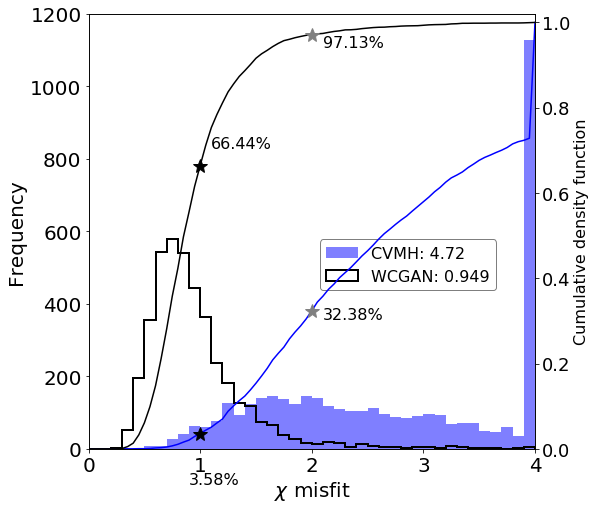

In [184]:
col1 = 'blue'
col2 = 'orange'
col2 = 'black'
valmax = 4
plt.figure(figsize=(8,8))
import scipy.stats as st
plt.hist(CVMH_mis, density=False, alpha=0.5, color=col1, range=(0,valmax), bins=int(40*valmax/4), label="CVMH: 4.72")
plt.hist(WCGAN_mis, density=False, histtype='step', facecolor='g', alpha=1.0, linewidth=2, color=col2, range=(0,valmax), bins=int(40*valmax/4), label="WCGAN: 0.949")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 0.5), edgecolor='black', framealpha=0.5, fontsize=16)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('$\chi$ misfit', fontsize=20)
plt.xlim([0,valmax])
plt.ylim([0,1200])
plt.tick_params(labelsize=20)

#plt.title("Histogram",fontsize=26);
ax = plt.gca()
ax2 = ax.twinx()
xval, dense = cumulative_density(CVMH_mis,81,0,valmax)
ax2.plot(xval, dense, color=col1)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(0.9, dense[idx]-0.12, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.02, '%2.2f%%' % (dense[idx]*100), fontsize=16)

xval, dense = cumulative_density(WCGAN_mis,81,0,valmax)
ax2.plot(xval, dense, color=col2)
ax2.set_ylim((0,1.02))
ax2.set_ylabel("Cumulative density function",color="black",fontsize=16)
ax2.yaxis.set_tick_params(labelsize=18)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.1, dense[idx]+0.04, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.03, '%2.2f%%' % (dense[idx]*100), fontsize=16)

plt.savefig(misfit_path+'hist_CVMH_Chi.jpg', format='jpg', bbox_inches='tight', dpi=1200)
#plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.pdf', format='pdf')
plt.show()

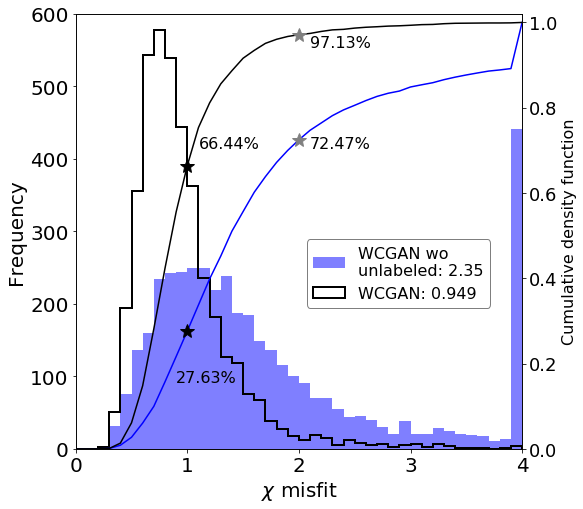

In [172]:
col1 = 'blue'
col2 = 'orange'
col2 = 'black'
plt.figure(figsize=(8,8))
import scipy.stats as st
plt.hist(GAN_mis, density=False, alpha=0.5, color=col1, range=(0,4), bins=40, label="WCGAN wo\nunlabeled: 2.35")
plt.hist(WCGAN_mis, density=False, histtype='step', facecolor='g', alpha=1.0, linewidth=2, color=col2, range=(0,4), bins=40, label="WCGAN: 0.949")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 0.5), edgecolor='black', framealpha=0.5, fontsize=16)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('$\chi$ misfit', fontsize=20)
plt.xlim([0,4])
plt.ylim([0,600])
plt.tick_params(labelsize=20)

#plt.title("Histogram",fontsize=26);
ax = plt.gca()
ax2 = ax.twinx()
xval, dense = cumulative_density(GAN_mis,41,0,4)
ax2.plot(xval, dense, color=col1)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(0.9, dense[idx]-0.12, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.02, '%2.2f%%' % (dense[idx]*100), fontsize=16)

xval, dense = cumulative_density(WCGAN_mis,41,0,4)
ax2.plot(xval, dense, color=col2)
ax2.set_ylim((0,1.02))
ax2.set_ylabel("Cumulative density function",color="black",fontsize=16)
ax2.yaxis.set_tick_params(labelsize=18)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.1, dense[idx]+0.04, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.03, '%2.2f%%' % (dense[idx]*100), fontsize=16)

plt.savefig(misfit_path+'hist_GAN_Chi.jpg', format='jpg', bbox_inches='tight', dpi=1200)
#plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.pdf', format='pdf')
plt.show()

In [177]:
print(np.linspace(0,16,41))

[ 0.   0.4  0.8  1.2  1.6  2.   2.4  2.8  3.2  3.6  4.   4.4  4.8  5.2
  5.6  6.   6.4  6.8  7.2  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8
 11.2 11.6 12.  12.4 12.8 13.2 13.6 14.  14.4 14.8 15.2 15.6 16. ]


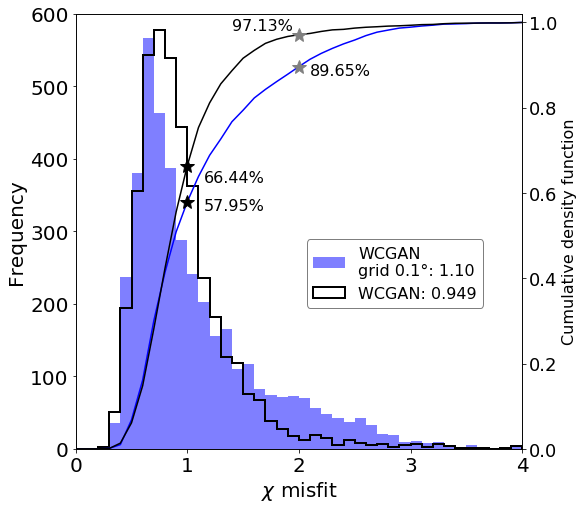

In [194]:
col1 = 'blue'
col2 = 'orange'
col2 = 'black'
plt.figure(figsize=(8,8))
import scipy.stats as st
plt.hist(WCGAN_grid01_mis, density=False, alpha=0.5, color=col1, range=(0,4), bins=40, label="WCGAN\ngrid 0.1\N{DEGREE SIGN}: 1.10")
plt.hist(WCGAN_mis, density=False, histtype='step', facecolor='g', alpha=1.0, linewidth=2, color=col2, range=(0,4), bins=40, label="WCGAN: 0.949")
plt.legend(loc="upper left", bbox_to_anchor=(0.5, 0.5), edgecolor='black', framealpha=0.5, fontsize=16)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('$\chi$ misfit', fontsize=20)
plt.xlim([0,4])
plt.ylim([0,600])
plt.tick_params(labelsize=20)

#plt.title("Histogram",fontsize=26);
ax = plt.gca()
ax2 = ax.twinx()
xval, dense = cumulative_density(WCGAN_grid01_mis,41,0,4)
ax2.plot(xval, dense, color=col1)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.15, dense[idx]-0.02, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(2.1, dense[idx]-0.02, '%2.2f%%' % (dense[idx]*100), fontsize=16)

xval, dense = cumulative_density(WCGAN_mis,41,0,4)
ax2.plot(xval, dense, color=col2)
ax2.set_ylim((0,1.02))
ax2.set_ylabel("Cumulative density function",color="black",fontsize=16)
ax2.yaxis.set_tick_params(labelsize=18)

idx = np.where(xval == 1.0)
ax2.plot(1.0,dense[idx],marker='*',markersize=15,color='black')
plt.text(1.15, dense[idx]-0.04, '%2.2f%%' % (dense[idx]*100), fontsize=16)
idx = np.where(xval == 2.0)
ax2.plot(2.0,dense[idx],marker='*',markersize=15,color='gray')
plt.text(1.4, dense[idx]+0.01, '%2.2f%%' % (dense[idx]*100), fontsize=16)

plt.savefig(misfit_path+'hist_WCGAN_grid01_Chi.jpg', format='jpg', bbox_inches='tight', dpi=1200)
#plt.savefig(misfit_path+'hist_WCGAN_pos_Chi.pdf', format='pdf')
plt.show()